In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [6]:
data = pd.read_csv("./player_combined_2021_2022.csv")

In [4]:
data = data.drop(columns=["Unnamed: 0", "Born", "Nation", "Squad"])

In [7]:
data

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,64.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,48.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,110.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
4,4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,...,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2916,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,22,1999,28.8,52.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,2917,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,23,1997,25.6,58.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,2918,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,49.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,2919,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,1.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [9]:
data = data.drop(columns=["Unnamed: 0"])

In [14]:
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklWon,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,64.0,44,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,48.0,27,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,23,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,110.0,60,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,0,...,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,22,1999,28.8,52.0,25,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,23,1997,25.6,58.0,33,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,49.0,21,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,1.0,1,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [43]:
standard_features = [
    "Player",
    "Pos",
    "Age",
    "Nation",
    "Squad",
    "Comp",
    "MP",
    "Min",
    "90s",
]

In [28]:
defensive_features = [
    "Tkl",
    "TklWon",
    "Tkl_Def_3rd",
    "Tkl_Mid_3rd",
    "Dribbler_Tkl",
    "Tkl_Att",
    "Tkl%",
    "Total_blocks",
    "Shots_Blocked",
    "Passes_Blocked",
    "Int",
    "Tkl+Int",
    "Clr",
    "Tackles_to_win_possession",
    "recovered_balls"
]

In [32]:
possession_features = [
    "Touches",
    "Touches_def_penalty_area",
    "Touches_def_3rd",
    "Touches_mid_3rd",
    "Touches_att_3rd",
    "Touches_att_penalty_area",
    "Touches_live_ball",
    "Dribble_succ",
    "Dribble_att",
    "Dribble_succ%",
]

In [29]:
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklWon,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,64.0,44,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,48.0,27,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,23,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,110.0,60,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,0,...,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,22,1999,28.8,52.0,25,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,23,1997,25.6,58.0,33,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,49.0,21,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,1.0,1,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [44]:
data_standard_features = data[standard_features]

In [33]:
data_defensive_features = data[defensive_features]

In [34]:
data_possession_features = data[possession_features]

In [35]:
data_standard_features

,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Dribbler_Tkl,Tkl_Att,Tkl%,Total_blocks,Shots_Blocked,Passes_Blocked,Int,Tkl+Int,Clr,Tackles_to_win_possession,recovered_balls
0,64.0,44,49.0,15.0,37.0,55.0,67.3,39.0,19.0,20.0,28,92.0,96.0,44,154.0
1,48.0,27,34.0,14.0,16.0,32.0,50.0,50.0,25.0,25.0,68,116.0,104.0,27,195.0
2,43.0,23,25.0,16.0,20.0,57.0,35.1,18.0,1.0,17.0,42,85.0,15.0,23,186.0
3,110.0,60,44.0,53.0,71.0,166.0,42.8,58.0,1.0,57.0,55,165.0,13.0,60,264.0
4,0.0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,52.0,25,19.0,30.0,22.0,44.0,50.0,30.0,13.0,17.0,49,101.0,48.0,25,139.0
2912,58.0,33,24.0,21.0,29.0,68.0,42.6,43.0,10.0,33.0,35,93.0,32.0,33,162.0
2913,49.0,21,6.0,24.0,22.0,61.0,36.1,18.0,1.0,17.0,11,60.0,11.0,21,162.0
2914,1.0,1,0.0,1.0,1.0,3.0,33.3,6.0,1.0,5.0,2,3.0,32.0,1,40.0


In [17]:
data_defensive_features = data.iloc[:,8:23]

In [18]:
data_defensive_features

,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,Dribbler_Tkl,Tkl_Att,Tkl%,Dribbled_past,Total_blocks,Shots_Blocked,Passes_Blocked,Int,Tkl+Int,Clr
0,64.0,44,49.0,15.0,0.0,37.0,55.0,67.3,18.0,39.0,19.0,20.0,28,92.0,96.0
1,48.0,27,34.0,14.0,0.0,16.0,32.0,50.0,16.0,50.0,25.0,25.0,68,116.0,104.0
2,43.0,23,25.0,16.0,2.0,20.0,57.0,35.1,37.0,18.0,1.0,17.0,42,85.0,15.0
3,110.0,60,44.0,53.0,13.0,71.0,166.0,42.8,95.0,58.0,1.0,57.0,55,165.0,13.0
4,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,52.0,25,19.0,30.0,3.0,22.0,44.0,50.0,22.0,30.0,13.0,17.0,49,101.0,48.0
2912,58.0,33,24.0,21.0,13.0,29.0,68.0,42.6,39.0,43.0,10.0,33.0,35,93.0,32.0
2913,49.0,21,6.0,24.0,19.0,22.0,61.0,36.1,39.0,18.0,1.0,17.0,11,60.0,11.0
2914,1.0,1,0.0,1.0,0.0,1.0,3.0,33.3,2.0,6.0,1.0,5.0,2,3.0,32.0


In [56]:
data.isnull().sum()

Player                0
Pos                   1
Comp                  0
Age                   0
90s                   0
                   ... 
OG                    0
recovered_balls       2
Aerial_duel_won       2
Aerial_duel_lost      2
Aerial_duel_won%    225
Length: 133, dtype: int64

In [57]:
data.columns[:10]

Index(['Player', 'Pos', 'Comp', 'Age', '90s', 'Tkl', 'TklWon', 'Tkl_Def_3rd',
       'Tkl_Mid_3rd', 'Tkl_Att_3rd'],
      dtype='object')

In [58]:
data["Comp"].unique()

array(['eng Premier League', 'fr Ligue 1', 'de Bundesliga', 'it Serie A',
       'es La Liga'], dtype=object)

In [59]:
data.shape

(2916, 133)

In [60]:
data["Pos"].value_counts().sum()

2915

In [61]:
data = data.dropna()

In [62]:
unique_values = data["Comp"].unique()

In [63]:
value_to_int_comp = {value: index for index, value in enumerate(unique_values)}

In [64]:
value_to_int_comp

{'eng Premier League': 0,
 'fr Ligue 1': 1,
 'de Bundesliga': 2,
 'it Serie A': 3,
 'es La Liga': 4}

In [65]:
data['Comp'] = data['Comp'].map(value_to_int_comp)

In [66]:
data

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,Max Aarons,DF,0,21,32.0,64.0,44,49.0,15.0,0.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,Yunis Abdelhamid,DF,1,33,33.1,48.0,27,34.0,14.0,0.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,Salis Abdul Samed,MF,1,21,27.4,43.0,23,25.0,16.0,2.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,Laurent Abergel,MF,1,28,32.8,110.0,60,44.0,53.0,13.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
5,Dickson Abiama,FW,2,22,8.1,11.0,7,4.0,5.0,2.0,...,11,15,7,0.0,0.0,0,28.0,19.0,30.0,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,MF,4,22,28.8,52.0,25,19.0,30.0,3.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,Szymon Żurkowski,MF,3,23,25.6,58.0,33,24.0,21.0,13.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,Martin Ødegaard,"MF,FW",0,22,30.9,49.0,21,6.0,24.0,19.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,Milan Đurić,FW,3,31,24.1,1.0,1,0.0,1.0,0.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [67]:
unique_values = data["Pos"].unique()

In [68]:
value_to_int_pos = {value: index for index, value in enumerate(unique_values)}

In [69]:
value_to_int_pos

{'DF': 0,
 'MF': 1,
 'FW': 2,
 'MF,FW': 3,
 'FW,MF': 4,
 'DF,MF': 5,
 'DF,FW': 6,
 'FW,DF': 7,
 'MF,DF': 8,
 'GK': 9}

In [70]:
data['Pos'] = data['Pos'].map(value_to_int_pos)

<AxesSubplot:>

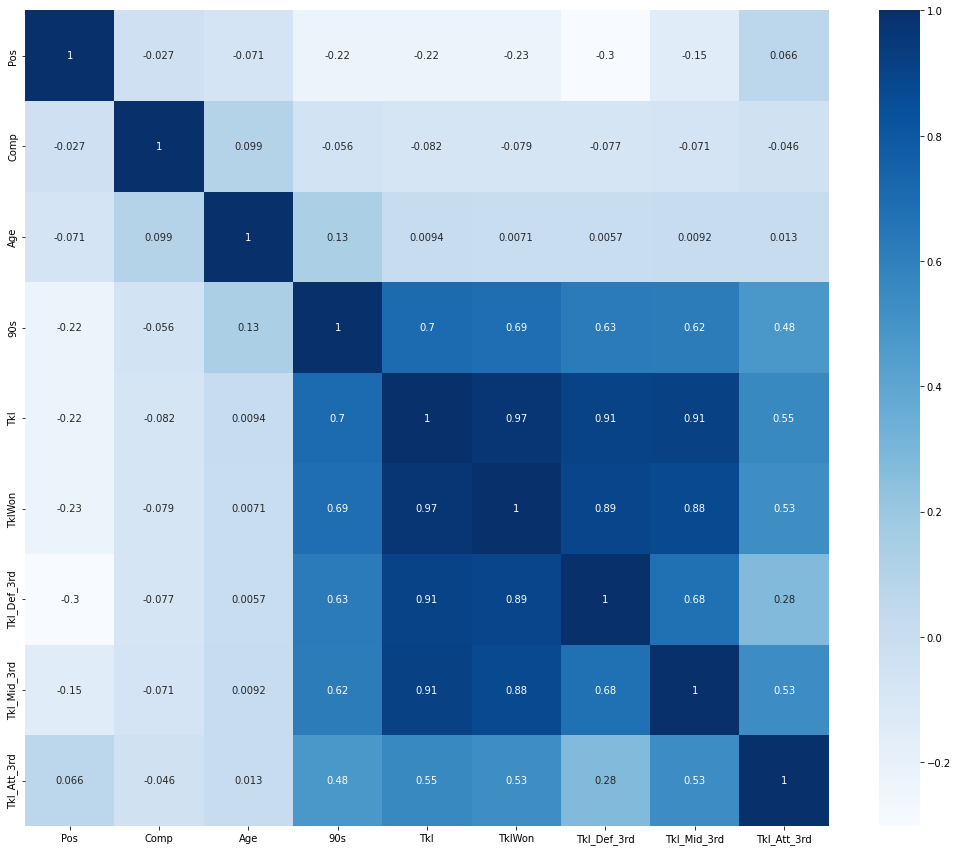

In [102]:
corr = data.iloc[:,1:10].corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, cmap="Blues", annot=True)

In [71]:
from sklearn.cluster import KMeans

In [72]:
tsne = TSNE(n_components=2, random_state=42)

In [73]:
data_tsne = tsne.fit_transform(data.iloc[:,1:])

In [74]:
kmeans = KMeans(n_clusters=8)

In [75]:
kmeans.fit(data_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [76]:
data

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,Max Aarons,0,0,21,32.0,64.0,44,49.0,15.0,0.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,Yunis Abdelhamid,0,1,33,33.1,48.0,27,34.0,14.0,0.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,Salis Abdul Samed,1,1,21,27.4,43.0,23,25.0,16.0,2.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,Laurent Abergel,1,1,28,32.8,110.0,60,44.0,53.0,13.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
5,Dickson Abiama,2,2,22,8.1,11.0,7,4.0,5.0,2.0,...,11,15,7,0.0,0.0,0,28.0,19.0,30.0,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,1,4,22,28.8,52.0,25,19.0,30.0,3.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,Szymon Żurkowski,1,3,23,25.6,58.0,33,24.0,21.0,13.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,Martin Ødegaard,3,0,22,30.9,49.0,21,6.0,24.0,19.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,Milan Đurić,2,3,31,24.1,1.0,1,0.0,1.0,0.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [77]:
predicted_values = kmeans.fit_predict(data_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [78]:
predicted_values.dtype

dtype('int32')

In [79]:
data.shape

(1910, 133)

In [80]:
predicted_values[:]

array([6, 4, 4, ..., 2, 1, 7])

In [82]:
data["cluster_number"] = predicted_values

In [83]:
data

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,cluster_number
0,Max Aarons,0,0,21,32.0,64.0,44,49.0,15.0,0.0,...,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6,6
1,Yunis Abdelhamid,0,1,33,33.1,48.0,27,34.0,14.0,0.0,...,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0,4
2,Salis Abdul Samed,1,1,21,27.4,43.0,23,25.0,16.0,2.0,...,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9,4
3,Laurent Abergel,1,1,28,32.8,110.0,60,44.0,53.0,13.0,...,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1,2
5,Dickson Abiama,2,2,22,8.1,11.0,7,4.0,5.0,2.0,...,15,7,0.0,0.0,0,28.0,19.0,30.0,38.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,1,4,22,28.8,52.0,25,19.0,30.0,3.0,...,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4,2
2912,Szymon Żurkowski,1,3,23,25.6,58.0,33,24.0,21.0,13.0,...,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9,0
2913,Martin Ødegaard,3,0,22,30.9,49.0,21,6.0,24.0,19.0,...,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8,2
2914,Milan Đurić,2,3,31,24.1,1.0,1,0.0,1.0,0.0,...,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5,1


In [84]:
data["Pos"].value_counts()

Pos
0    580
1    432
2    286
4    242
3    211
8     56
5     50
6     37
7     15
9      1
Name: count, dtype: int64

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
cluster_centroids = kmeans.cluster_centers_

In [ ]:
for i in range(len(data["cluster_number"].unique())):
    val = data[data["cluster_number"] == i]
    val["x"] = np.random.random((val.shape[0]))
    val["y"] = np.random.random((val.shape[0]))
    plt.figure(figsize=(20, 12))
    plt.title(f"Cluster {i}")
    plt.scatter(val["x"], val["y"])
    # Annotate the points with the player names
    for _, row in val.iterrows():
        annotation = f"{row['Player']} - {row['Pos']}"
        plt.annotate(annotation, (row["x"], row["y"]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.show()

In [88]:
val

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,cluster_number,x,y
19,Michel Aebischer,1,3,24,4.9,14.0,5,5.0,8.0,1.0,...,0.0,0.0,0,27.0,5.0,4.0,55.6,7,0.882984,0.531676
24,Kevin Agudelo,3,3,22,13.7,44.0,26,13.0,26.0,5.0,...,0.0,0.0,0,67.0,15.0,14.0,51.7,7,0.363889,0.072198
59,Iván Alejo,3,4,26,11.8,33.0,15,21.0,10.0,2.0,...,0.0,1.0,0,74.0,11.0,12.0,47.8,7,0.506860,0.084977
64,Mohamed Ali Cho,2,1,17,20.4,10.0,5,1.0,4.0,5.0,...,0.0,0.0,0,61.0,15.0,59.0,20.3,7,0.288495,0.148984
68,Dele Alli,1,0,25,7.3,14.0,8,10.0,3.0,1.0,...,1.0,0.0,0,40.0,7.0,11.0,38.9,7,0.838783,0.014094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,Yusuf Yazıcı,3,1,24,5.7,10.0,5,3.0,6.0,1.0,...,0.0,0.0,0,35.0,5.0,6.0,45.5,7,0.235440,0.549121
2866,Okay Yokuşlu,5,4,27,5.2,9.0,8,6.0,2.0,1.0,...,0.0,0.0,0,35.0,10.0,7.0,58.8,7,0.214758,0.132957
2877,Denis Zakaria,1,3,24,6.6,11.0,7,3.0,6.0,2.0,...,0.0,0.0,0,27.0,2.0,8.0,20.0,7,0.096903,0.993768
2897,Edon Zhegrova,3,1,22,5.3,14.0,5,2.0,8.0,4.0,...,0.0,1.0,0,32.0,1.0,2.0,33.3,7,0.922636,0.471158


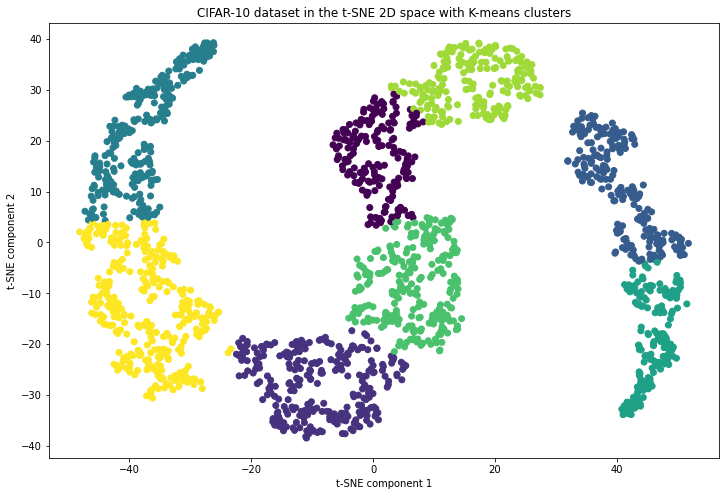

In [90]:
plt.figure(figsize=(12, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=predicted_values)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()